In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import re
from datetime import datetime

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
eeg = pd.read_csv("EEG_recording_2023-07-20-00.28.43.csv")

In [4]:
eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161796 entries, 0 to 161795
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamps  161796 non-null  float64
 1   TP9         161796 non-null  float64
 2   AF7         161796 non-null  float64
 3   AF8         161796 non-null  float64
 4   TP10        161796 non-null  float64
 5   Right AUX   161796 non-null  float64
dtypes: float64(6)
memory usage: 7.4 MB


In [5]:
eeg.head()

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.689813e+09,-24.902,-64.453,40.039,-40.039,0.0
1,1.689813e+09,-98.145,-65.918,-242.188,-98.145,0.0
2,1.689813e+09,-47.852,-59.082,-138.184,-57.129,0.0
3,1.689813e+09,46.387,-58.105,178.223,10.254,0.0
4,1.689813e+09,7.812,-60.059,119.141,-9.766,0.0


In [6]:
eeg['timestamps_alt'] = eeg.timestamps.apply(lambda x: datetime.fromtimestamp(x).strftime('%m/%d/%Y %H:%M:%S.%f')[:-3])

In [7]:
eeg.head(15)

,timestamps,TP9,AF7,AF8,TP10,Right AUX,timestamps_alt
0,1.689813e+09,-24.902,-64.453,40.039,-40.039,0.0,07/19/2023 20:28:49.256
1,1.689813e+09,-98.145,-65.918,-242.188,-98.145,0.0,07/19/2023 20:28:49.260
2,1.689813e+09,-47.852,-59.082,-138.184,-57.129,0.0,07/19/2023 20:28:49.264
3,1.689813e+09,46.387,-58.105,178.223,10.254,0.0,07/19/2023 20:28:49.268
4,1.689813e+09,7.812,-60.059,119.141,-9.766,0.0,07/19/2023 20:28:49.272
5,1.689813e+09,-94.727,-65.430,-296.875,-76.660,0.0,07/19/2023 20:28:49.276
6,1.689813e+09,-80.566,-64.941,-233.887,-78.613,0.0,07/19/2023 20:28:49.280
7,1.689813e+09,17.578,-56.641,151.855,-18.555,0.0,07/19/2023 20:28:49.284
8,1.689813e+09,24.902,-65.918,42.480,-0.977,0.0,07/19/2023 20:28:49.288
9,1.689813e+09,-68.359,-75.684,-387.207,-52.734,0.0,07/19/2023 20:28:49.291


In [8]:
log_file = open('log_7_19_2.log', 'r', encoding='utf-8')

In [9]:
all_lines = log_file.readlines()

In [10]:
damage_giventime = []
damage_takentime = []

for line in all_lines:
    ts = datetime.strptime(line[:21], '%m/%d/%Y - %H:%M:%S').strftime('%m/%d/%Y %H:%M:%S')
    info = line[23:]
    if info.startswith('Damage Taken'):
        damage = re.findall(r'\d+ in \d+ hits', info)
        if damage == []:
            damage = re.findall(r'\d+ in \d+ hit', info)
        damage = damage[0].split()[0]
        damage_takentime.append((ts, datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').timestamp(), int(damage)))
        #print(damage, 'Taken')
    if info.startswith('Damage Given'):
        damage = re.findall(r'\d+ in \d hits', info)
        if damage == []:
            damage = re.findall(r'\d+ in \d+ hit', info)
        damage = damage[0].split()[0]
        damage_giventime.append((ts, datetime.strptime(ts, '%m/%d/%Y %H:%M:%S').timestamp(), int(damage)))
        #print(damage, 'Given')

In [11]:
damage_giventime

[('07/19/2023 20:29:26', 1689812966.0, 437),
 ('07/19/2023 20:29:47', 1689812987.0, 84),
 ('07/19/2023 20:30:33', 1689813033.0, 49),
 ('07/19/2023 20:30:49', 1689813049.0, 32),
 ('07/19/2023 20:31:31', 1689813091.0, 182),
 ('07/19/2023 20:31:49', 1689813109.0, 44),
 ('07/19/2023 20:32:01', 1689813121.0, 108),
 ('07/19/2023 20:32:01', 1689813121.0, 83),
 ('07/19/2023 20:32:38', 1689813158.0, 42),
 ('07/19/2023 20:32:38', 1689813158.0, 50),
 ('07/19/2023 20:32:53', 1689813173.0, 22),
 ('07/19/2023 20:33:05', 1689813185.0, 90),
 ('07/19/2023 20:33:15', 1689813195.0, 20),
 ('07/19/2023 20:33:30', 1689813210.0, 81),
 ('07/19/2023 20:33:36', 1689813216.0, 98),
 ('07/19/2023 20:34:17', 1689813257.0, 46),
 ('07/19/2023 20:34:24', 1689813264.0, 20),
 ('07/19/2023 20:34:24', 1689813264.0, 112),
 ('07/19/2023 20:34:34', 1689813274.0, 94),
 ('07/19/2023 20:34:34', 1689813274.0, 154),
 ('07/19/2023 20:34:39', 1689813279.0, 78),
 ('07/19/2023 20:34:46', 1689813286.0, 69),
 ('07/19/2023 20:35:01', 16

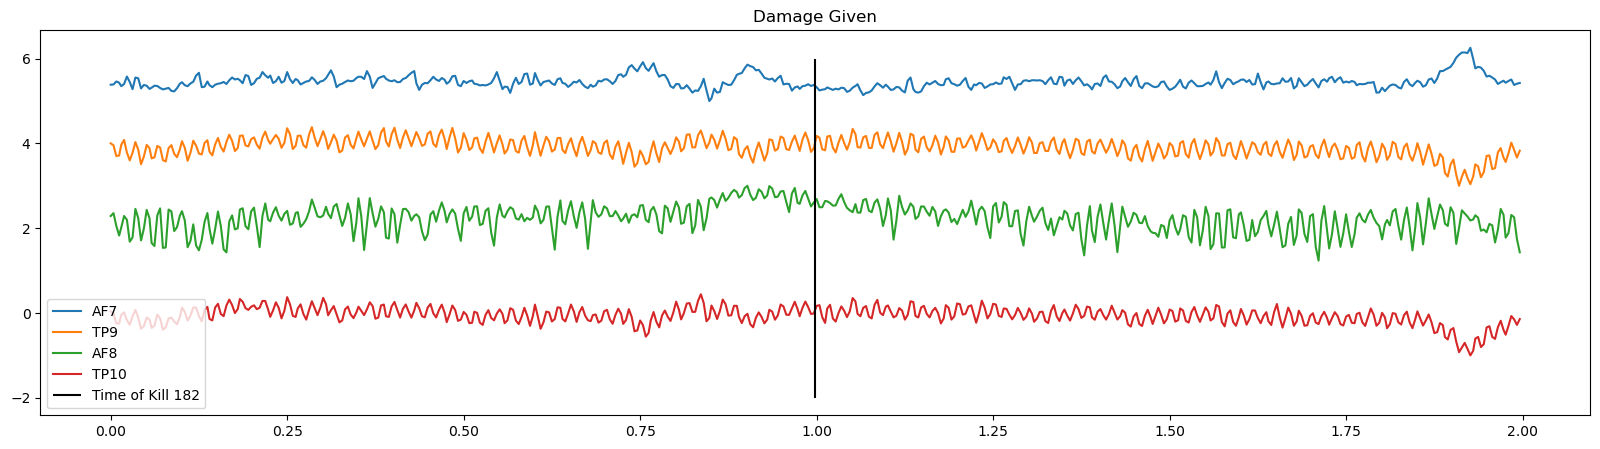

In [12]:
event = damage_giventime[4]
mark = event[1]
dam = event[2]
eeg_mark = eeg.query("@mark-1 <= timestamps <= @mark+1")
y_tp9 = eeg_mark['TP9']
y_af7 = eeg_mark['AF7']
y_af8 = eeg_mark['AF8']
y_tp10 = eeg_mark['TP10']
x = np.array(eeg_mark.timestamps)
plt.figure(figsize = (20,5))
plt.plot(x-x[0], y_af7/max(abs(y_af7)) + 6, label = 'AF7')
plt.plot(x-x[0], y_tp9/max(abs(y_tp9)) + 4, label = 'TP9')
plt.plot(x-x[0], y_af8/max(abs(y_af8)) + 2, label = 'AF8')
plt.plot(x-x[0], y_tp10/max(abs(y_tp10)), label = 'TP10')
plt.vlines(mark-x[0], -2, 6, colors = 'black', label = f'Time of Kill {dam}')
plt.title("Damage Given")
plt.legend()
plt.show()

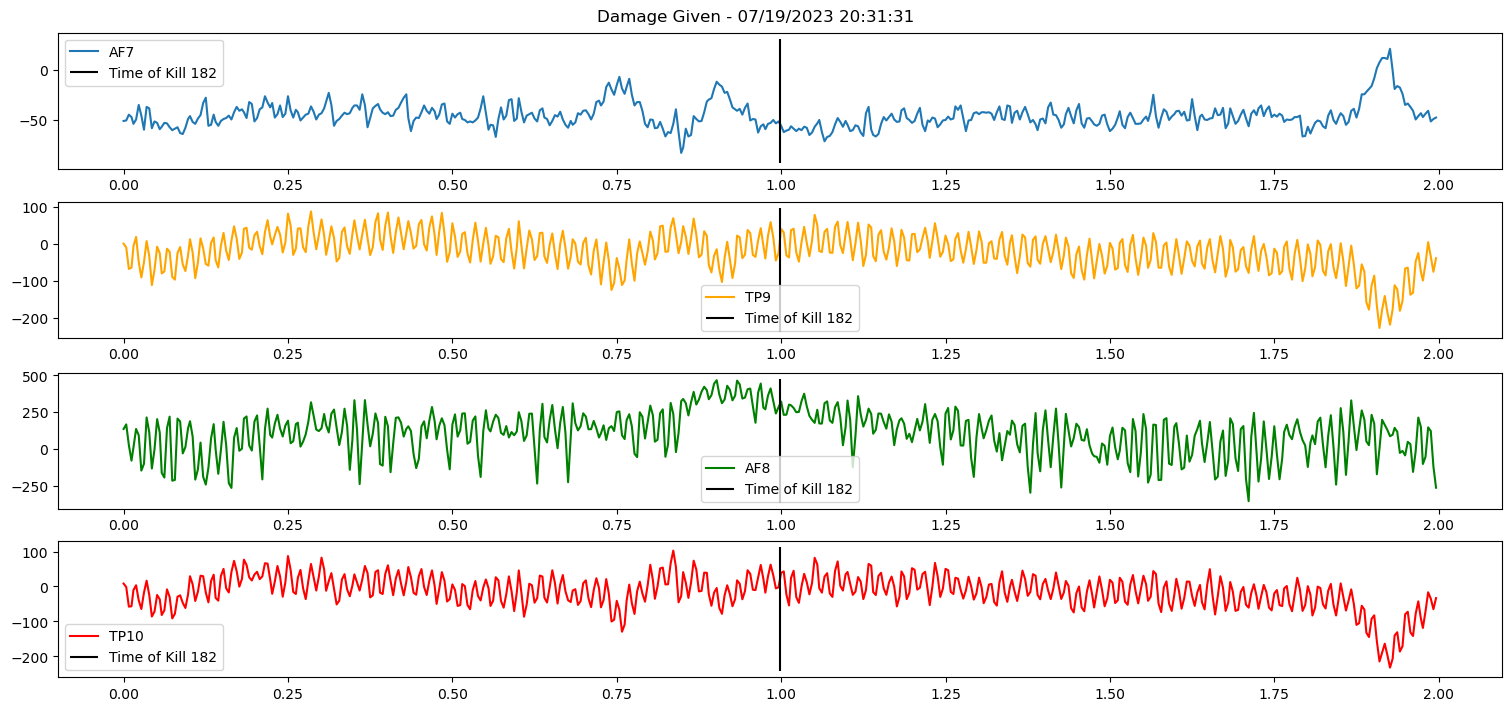

In [40]:
event = damage_giventime[4]
mark = event[1]
dam = event[2]
eeg_mark = eeg.query("@mark-1 <= timestamps <= @mark+1")
y_tp9 = eeg_mark['TP9']
y_af7 = eeg_mark['AF7']
y_af8 = eeg_mark['AF8']
y_tp10 = eeg_mark['TP10']
x = np.array(eeg_mark.timestamps)

fig, axis = plt.subplots(4, 1, constrained_layout = True, figsize = (15,7))
fig.suptitle(f"Damage Given - {event[0]}")
#plt.subplot(4,1,1)
axis[0].plot(x-x[0], y_af7, label = 'AF7')
axis[0].vlines(mark-x[0], min(y_af7)-10, max(y_af7)+10, colors = 'black', label = f'Time of Kill {dam}')
axis[0].legend()

#plt.subplot(4,1,2)
axis[1].plot(x-x[0], y_tp9, label = 'TP9', color = 'orange')
axis[1].vlines(mark-x[0], min(y_tp9)-10, max(y_tp9)+10, colors = 'black', label = f'Time of Kill {dam}')
axis[1].legend()

#plt.subplot(4,1,3)
axis[2].plot(x-x[0], y_af8, label = 'AF8', color = 'green')
axis[2].vlines(mark-x[0], min(y_af8)-10, max(y_af8)+10, colors = 'black', label = f'Time of Kill {dam}')
axis[2].legend()

#plt.subplot(4,1,4)
axis[3].plot(x-x[0], y_tp10, label = 'TP10', color = 'red')
axis[3].vlines(mark-x[0], min(y_tp10)-10, max(y_tp10)+10, colors = 'black', label = f'Time of Kill {dam}')
axis[3].legend()


In [35]:
damage_takentime

[('07/19/2023 20:28:47', 1689812927.0, 132),
 ('07/19/2023 20:29:13', 1689812953.0, 107),
 ('07/19/2023 20:29:26', 1689812966.0, 101),
 ('07/19/2023 20:29:47', 1689812987.0, 104),
 ('07/19/2023 20:29:57', 1689812997.0, 103),
 ('07/19/2023 20:30:15', 1689813015.0, 85),
 ('07/19/2023 20:30:33', 1689813033.0, 78),
 ('07/19/2023 20:30:33', 1689813033.0, 62),
 ('07/19/2023 20:30:49', 1689813049.0, 110),
 ('07/19/2023 20:31:31', 1689813091.0, 131),
 ('07/19/2023 20:31:49', 1689813109.0, 108),
 ('07/19/2023 20:32:01', 1689813121.0, 75),
 ('07/19/2023 20:32:09', 1689813129.0, 285),
 ('07/19/2023 20:32:38', 1689813158.0, 44),
 ('07/19/2023 20:32:53', 1689813173.0, 27),
 ('07/19/2023 20:33:05', 1689813185.0, 25),
 ('07/19/2023 20:33:05', 1689813185.0, 108),
 ('07/19/2023 20:33:15', 1689813195.0, 100),
 ('07/19/2023 20:33:30', 1689813210.0, 107),
 ('07/19/2023 20:33:36', 1689813216.0, 126),
 ('07/19/2023 20:33:55', 1689813235.0, 112),
 ('07/19/2023 20:34:17', 1689813257.0, 81),
 ('07/19/2023 20:3